## Horse VS Man
Create a model to perform binary classification between horse and
human images using convolutional neural networks. italicized text

In [ ]:
## new data

In [ ]:
!pip install opendatasets
#https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omharne
Your Kaggle Key: ··········


100%|██████████| 307M/307M [00:02<00:00, 116MB/s]


In [ ]:
import os
#training data
train_horse = os.path.join('/content/horses-or-humans-dataset/horse-or-human/train/horses')

train_human = os.path.join('/content/horses-or-humans-dataset/horse-or-human/train/humans')

In [ ]:
#lets look at the names of the horse images and human images
train_horse_name = os.listdir('/content/horses-or-humans-dataset/horse-or-human/train/horses')
train_horse_name[:5]

['horse04-7.png',
 'horse15-6.png',
 'horse20-1.png',
 'horse35-1.png',
 'horse41-3.png']

In [ ]:
train_human_name = os.listdir('/content/horses-or-humans-dataset/horse-or-human/train/humans')
train_human_name[:5]

['human01-19.png',
 'human04-15.png',
 'human01-25.png',
 'human14-05.png',
 'human08-30.png']

In [ ]:
#Printing all number of images in train dataset
print('total_horse_images = ', len(os.listdir(train_horse)))
print('total_human_images = ', len(os.listdir(train_human)))

total_horse_images =  500
total_human_images =  527


In [ ]:
#creating the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img
model = Sequential()

In [ ]:
#First convolution
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3))),
model.add(MaxPooling2D(2, 2)),

#Second convolution
model.add(Conv2D(32, (3, 3), activation = 'relu')),
model.add(MaxPooling2D(2,2)),

#Third convolution
model.add(Conv2D(64, (3, 3), activation = 'relu')),
model.add(MaxPooling2D(2,2)),

# Forth convolution
model.add(Conv2D(64, (3, 3), activation = 'relu')),
model.add(MaxPooling2D(2,2)),

#Fifth convolution
model.add(Conv2D(64, (3, 3), activation = 'relu')),
model.add(MaxPooling2D(2,2)),
                       
#Flattening the layer for giving it to DNN
model.add(Flatten()),

#Adding Artificial neurons
model.add(Dense(512, activation = 'relu'))

#Output neuron
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
#Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Rescaling the images 
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)
#giving the path
train_generator = train_datagen.flow_from_directory('/content/horses-or-humans-dataset/horse-or-human/horse-or-human/train',
                                                    target_size = (300,300),
                                                    batch_size = 100,
                                                    class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory('/content/horses-or-humans-dataset/horse-or-human/validation',
                                                  target_size = (300,300,),
                                                  batch_size = 100,
                                                  class_mode = 'binary')

Found 256 images belonging to 2 classes.


In [ ]:
model.fit(train_generator, epochs = 3,
                    steps_per_epoch = 1027//100,
                    verbose = 1,
                    validation_data = test_generator,
                    validation_steps = 256//100)

Epoch 1/3
10/10 [==============================] - 114s 12s/step - loss: 0.6759 - accuracy: 0.6936 - val_loss: 0.5350 - val_accuracy: 0.8050
Epoch 2/3
10/10 [==============================] - 111s 11s/step - loss: 0.3487 - accuracy: 0.8770 - val_loss: 1.6964 - val_accuracy: 0.7500
Epoch 3/3
10/10 [==============================] - 125s 12s/step - loss: 0.2145 - accuracy: 0.9202 - val_loss: 1.3741 - val_accuracy: 0.7700


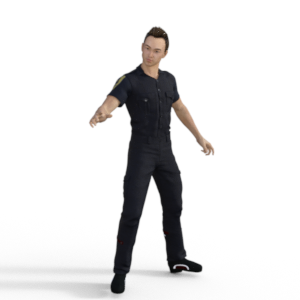

In [ ]:
image = load_img('/content/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-06.png')
image

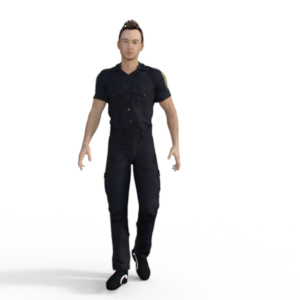

In [ ]:
image = load_img('/content/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-01.png')
image

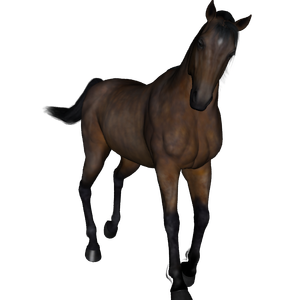

In [ ]:
image = load_img('/content/horses-or-humans-dataset/horse-or-human/validation/horses/horse1-122.png')
image

In [ ]:
import numpy as np
img_array = np.array(image)
img_array_reshape = img_array.reshape(1, 300, 300, 3)# the final layer is stacking all the layers together
model.predict(img_array_reshape)

1/1 [==============================] - 0s 201ms/step


array([[1.]], dtype=float32)

In [ ]:
if model.predict(img_array_reshape) >= 0.5:
  print("The above image is of Human")
else:
  print("The above image is of Horse")

1/1 [==============================] - 0s 62ms/step
The above image is of Human


In [ ]:
#Testing the model on images
image = load_img('/content/horses-or-humans-dataset/horse-or-human/validation/horses/horse1-335.png')
img_array = np.array(image)
img_array_reshape = img_array.reshape(1, 300, 300, 3)
output = model.predict(img_array_reshape)
if model.predict(img_array_reshape) >= 0.5:
  print("The given image is of Human")
else:
  print("The given image is of Horse")

1/1 [==============================] - 0s 84ms/step
The given image is of Horse


In [ ]:
#testing the model on images
image = load_img('/content/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman05-22.png')
img_array = np.array(image)
img_array_reshape = img_array.reshape(1, 300, 300, 3)
output = model.predict(img_array_reshape)
if model.predict(img_array_reshape) >= 0.5:
  print("The Given image is of Human")
else:
  print("The Given image is of Horse")

1/1 [==============================] - 0s 78ms/step
The Given image is of Human
